# Update/change an existing target

Sometime, you don't want to use the pre-defined targets as given. You may want to change the model function parameters (the `kwargs`) or even the function (the `func`) used to draw the target's parameters. 

You can do that while calling `draw()`, `from_draw()` or simply using `update_model()`. 

Let's see the differences.

***
## Changing model entry's parameters

This is the simplest and the most commun usage. 

You want to change the model's parameters. You can do that using `**kwargs` of `draw()` (`from_draw()`) method, with the format:
```python
{entry_name: dict}
```


For instance, let's change the **alpha** and **beta** parameters of the SNeIa model ; these are parameters of the **magabs** function (see, `skysurvey.target.snia.SNeIaMagnitude.tripp1998`):

In [1]:
import skysurvey

snia = skysurvey.SNeIa.from_draw(size=1_000, 
                                 magabs={"alpha":-0.15, "beta":3.8} # kwargs here
                                )
snia.data

,z,x1,c,t0,ra,dec,magabs,mwebv,magobs,x0,template
0,0.1415,1.760,0.025,56147.136719,21.328362,77.013252,-19.441059,0.611910,19.757908,0.000198,salt2
1,0.1765,0.430,0.086,56197.777344,36.930416,46.576397,-19.027824,0.130971,20.697411,0.000083,salt2
2,0.1275,0.715,-0.006,56139.773438,240.517410,61.403599,-19.629868,0.018148,19.323694,0.000296,salt2
3,0.1955,-2.080,0.057,56085.617188,65.790665,17.981346,-18.820614,0.271542,21.150856,0.000055,salt2
4,0.1485,0.125,0.013,56010.746094,337.606689,-28.230463,-19.452829,0.022114,19.860435,0.000180,salt2
...,...,...,...,...,...,...,...,...,...,...,...
995,0.1715,-1.605,0.031,56059.089844,253.403152,-61.717922,-18.833094,0.317936,20.823257,0.000074,salt2
996,0.1575,0.430,-0.007,56096.007812,100.309158,71.301147,-19.349052,0.130122,20.103994,0.000144,salt2
997,0.1245,0.485,0.156,56072.460938,64.101456,0.542833,-18.829380,0.138705,20.068319,0.000149,salt2
998,0.1485,0.585,0.090,56092.609375,51.308292,14.201365,-19.087784,0.224690,20.225481,0.000129,salt2


**Using `kwargs` does not update the actual instance's model, but simply what is used to draw the data**

Consequently, so the ``model`` itself is not changed.

In [2]:
snia.model

{'redshift': {'kwargs': {'zmax': 0.2}, 'as': 'z'},
 'x1': {'func': <function SNeIaStretch.nicolas2021 at 0x15e9ab7f0>},
 'c': {'func': <function SNeIaColor.intrinsic_and_dust at 0x15e9ab760>},
 't0': {'func': <built-in method uniform of numpy.random.mtrand.RandomState object at 0x107ea8340>,
        'kwargs': {'low': 56000, 'high': 56200}},
 'magabs': {'func': <function SNeIaMagnitude.tripp1998 at 0x15e9ab880>,
            'kwargs': {'x1': '@x1', 'c': '@c', 'mabs': -19.3, 'sigmaint': 0.1}},
 'magobs': {'func': 'magabs_to_magobs',
            'kwargs': {'z': '@z', 'magabs': '@magabs'}},
 'x0': {'func': 'magobs_to_amplitude',
        'kwargs': {'magobs': '@magobs', 'param_name': 'x0'}},
 'radec': {'func': <function random_radec at 0x15d9da4d0>,
           'kwargs': {},
           'as': ['ra', 'dec']},
 'mwebv': {'func': <function get_mwebv at 0x15e9aad40>,
           'kwargs': {'ra': '@ra', 'dec': '@dec'}}}

### how to permanently change instance's model parameters ?

To permanently change the model of the instance, you need to use ``self.update_model_parameter()``

In [3]:
snia.update_model_parameter(magabs={"alpha":-0.15, "beta":3.8} )
snia.model

{'redshift': {'kwargs': {'zmax': 0.2}, 'as': 'z'},
 'x1': {'func': <function SNeIaStretch.nicolas2021 at 0x15e9ab7f0>},
 'c': {'func': <function SNeIaColor.intrinsic_and_dust at 0x15e9ab760>},
 't0': {'func': <built-in method uniform of numpy.random.mtrand.RandomState object at 0x107ea8340>,
        'kwargs': {'low': 56000, 'high': 56200}},
 'magabs': {'func': <function SNeIaMagnitude.tripp1998 at 0x15e9ab880>,
            'kwargs': {'x1': '@x1',
                       'c': '@c',
                       'mabs': -19.3,
                       'sigmaint': 0.1,
                       'alpha': -0.15,
                       'beta': 3.8}},
 'magobs': {'func': 'magabs_to_magobs',
            'kwargs': {'z': '@z', 'magabs': '@magabs'}},
 'x0': {'func': 'magobs_to_amplitude',
        'kwargs': {'magobs': '@magobs', 'param_name': 'x0'}},
 'radec': {'func': <function random_radec at 0x15d9da4d0>,
           'kwargs': {},
           'as': ['ra', 'dec']},
 'mwebv': {'func': <function get_mwebv at 0x1

***
## Changing model entry's (`func` and `kwargs`)

You can also change the way a parameter is drawn, not just it's function parameters.

To do so, you need to update `func` and provide its new `kwargs` (if any). This means, updating the `model` for the entry.

To do that, you can use:
- the **model** option in `draw()`: this will update the model used to draw but will not affect the actual instance's model
- the **model** option in `from_draw()`: this changes the model while creating the instance, it is thus permanent 
- the `update_model()` method: this is permanent (it is what `from_draw()` uses).

The format is that of a model (see [modelDAG](https://modeldag.readthedocs.io/en/latest/)):
```python
{entry_name: {"func": a_function, ["kwargs": dict, "as": string_or_list]}}
```


For instance, say we want to change how the **c** parameter is drawn, we want to use a uniform distribution between -1 and +3: 

In [4]:
import numpy as np
new_model_for_c = {"c": {"func": np.random.uniform, "kwargs": {"low":-1, "high":+3}}}

In [5]:
snia = skysurvey.SNeIa.from_draw(size=1_000, 
                                 model=new_model_for_c
                                )


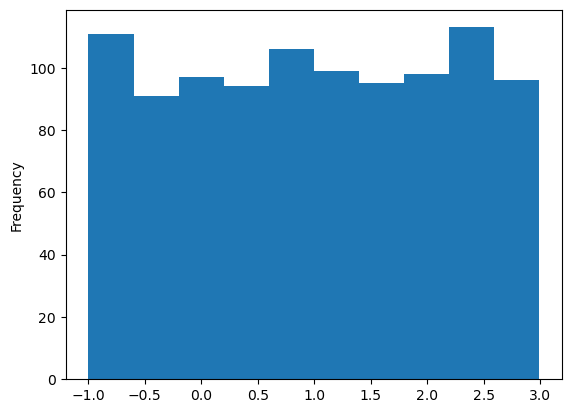

In [7]:
ax = snia.data["c"].plot.hist()

**here, the change is permanent, as you changed the model used to load the instance**

In [8]:
snia.model # check-out the c-entry

{'redshift': {'kwargs': {'zmax': 0.2}, 'as': 'z'},
 'x1': {'func': <function SNeIaStretch.nicolas2021 at 0x15e9ab7f0>},
 'c': {'func': <built-in method uniform of numpy.random.mtrand.RandomState object at 0x107ea8340>,
       'kwargs': {'low': -1, 'high': 3}},
 't0': {'func': <built-in method uniform of numpy.random.mtrand.RandomState object at 0x107ea8340>,
        'kwargs': {'low': 56000, 'high': 56200}},
 'magabs': {'func': <function SNeIaMagnitude.tripp1998 at 0x15e9ab880>,
            'kwargs': {'x1': '@x1',
                       'c': '@c',
                       'mabs': -19.3,
                       'sigmaint': 0.1,
                       'alpha': -0.15,
                       'beta': 3.8}},
 'magobs': {'func': 'magabs_to_magobs',
            'kwargs': {'z': '@z', 'magabs': '@magabs'}},
 'x0': {'func': 'magobs_to_amplitude',
        'kwargs': {'magobs': '@magobs', 'param_name': 'x0'}},
 'radec': {'func': <function random_radec at 0x15d9da4d0>,
           'kwargs': {},
          

to change the model only for a `draw()` call

In [9]:
snia = skysurvey.SNeIa()
data_updated = snia.draw(size=1_000, model=new_model_for_c)
data_not_updated = snia.draw(size=1_000)

<Axes: ylabel='Frequency'>

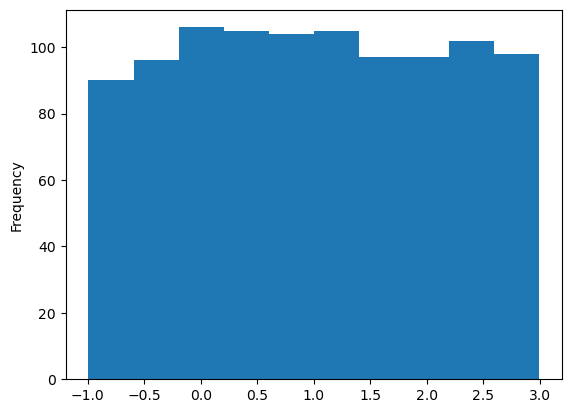

In [10]:
data_updated["c"].plot.hist()

<Axes: ylabel='Frequency'>

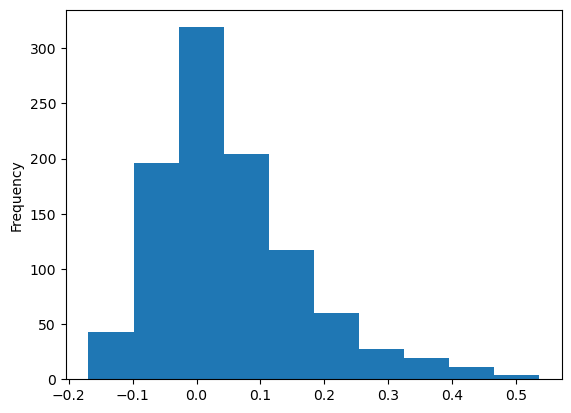

In [11]:
data_not_updated["c"].plot.hist()

### use `update_model()`

you can directly change (permanently) the model using update_model

In [12]:
flat_model = {"c": {"func": np.random.uniform, "kwargs": {"low":-0.1, "high":+1}},
              "x1": {"func": np.random.uniform, "kwargs": {"low":-3, "high":+3}}
             }

snia = skysurvey.SNeIa()
snia.update_model(**flat_model)
data = snia.draw(1_000)

In [13]:
data

,z,x1,c,t0,ra,dec,magabs,mwebv,magobs,x0
0,0.1885,0.665288,0.447963,56069.171052,104.063388,13.861196,-17.826115,0.126505,22.057327,0.000024
1,0.1215,1.184886,0.485408,56179.393740,20.669520,-29.894300,-17.454705,0.022607,21.385853,0.000044
2,0.1905,-0.541452,0.609366,56153.072330,79.858948,-67.312710,-16.934401,0.184147,22.974497,0.000010
3,0.1125,-2.001423,0.519839,56005.453281,138.008385,-46.496474,-17.058023,1.460178,21.602781,0.000036
4,0.1895,-0.126974,0.383725,56053.551037,46.423932,47.912675,-17.765805,0.309874,22.130396,0.000022
...,...,...,...,...,...,...,...,...,...,...
995,0.1205,-2.849182,0.597750,56010.155082,359.919621,1.702199,-16.470616,0.031416,22.350600,0.000018
996,0.0535,2.464097,0.851318,56186.504333,293.625448,-4.937156,-16.479586,0.386175,20.480242,0.000102
997,0.1055,2.359446,-0.068122,56019.927237,270.775972,-6.981515,-20.012424,0.938058,18.498941,0.000633
998,0.0875,0.979950,0.529790,56099.885159,274.646775,-47.078267,-17.276937,0.152540,20.802187,0.000076


### shall I update a model or create a new one ?

`model` option can **affect any entry**, you can even **add entry**, but any new entry will be appended at the end of the dist model. **So to create an internal dependency, you will need to create a new model from scratch.**


***
## How to insert a new entry to create an internal dependency


Say you want to randomly draw **beta** from a normal distribution and use this drawn parameter as input of **magabs**


**using update_model() will also work** because `modeldag` order the model entry prior to call draw() so beta will be inserted prior magabs the used `model` dict.

In [17]:
random_beta_model = {"beta": {"func": np.random.normal, "kwargs": {"loc":3.5, "scale":0.1}},
                     "magabs": {"func": skysurvey.target.snia.SNeIaMagnitude.tripp1998,
                                "kwargs": {"x1":"@x1", "c":"@c", "beta":"@beta"}}
                     }

In [18]:
snia = skysurvey.SNeIa()

In [20]:
data = snia.draw(1_000, model=random_beta_model)

In [21]:
data

,z,x1,c,t0,ra,dec,beta,magabs,mwebv,magobs,x0
0,0.1945,-0.330,-0.170,56177.283275,253.306990,-41.153120,3.492835,-19.737885,3.999539,20.221191,0.000129
1,0.1585,1.110,0.054,56022.538135,18.245349,-13.469945,3.296955,-19.173935,0.026768,20.294179,0.000121
2,0.1275,-1.645,0.224,56031.815803,41.535613,-15.089276,3.451007,-18.378532,0.029865,20.575030,0.000093
3,0.0975,1.100,-0.002,56108.639564,47.093234,16.898283,3.438532,-19.484043,0.104441,18.844602,0.000460
4,0.1715,0.935,0.172,56112.934913,85.971827,-51.070121,3.422672,-18.777662,0.058244,20.878689,0.000071
...,...,...,...,...,...,...,...,...,...,...,...
995,0.1845,-1.395,-0.070,56067.813080,61.610343,13.495875,3.364367,-19.275349,0.305994,20.556421,0.000095
996,0.1835,-0.550,-0.034,56148.673753,149.703543,33.403203,3.483895,-19.315373,0.014414,20.503318,0.000100
997,0.1835,0.685,0.070,56026.742054,330.377240,11.485878,3.651628,-19.166253,0.083082,20.652438,0.000087
998,0.1765,0.755,0.428,56050.979680,128.952856,-63.269272,3.687551,-17.857430,0.206761,21.867804,0.000028
